### To Predict the predominant reason for absenteeism from work

### Problem

From a business perspective, employees who are not present to do their jobs, will cost more than they should. The absence is a big problem because it reduces output and is annoying because it requires rescheduling and changing programs which is one of the contributing factors to the failure of a department's organization to meet performance targets.

### Objective

Based on these problems, this analysis is carried out to predict the predominant reason for employees absenteeism from work. To get answers to these problems, an analysis is carried out using supervised machine learning: Logistic regression.

### Import relevant libraries

In [78]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

### Load DataSet

In [2]:
data = pd.read_csv('Absenteeism_data.csv')

In [76]:
data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


#### Feature Descriptions

•	ID : Individual identification

•	Reason of absence : Reasons 1-21 are registered in the International Classification Diseases(ICD)
1.	Certain infectious or parasitic diseases
2.	Neoplasms
3.	Diseases of the blood or blood-forming organs and certain disorders involving the immune mechanism
4.	Endocrine, nutritional or metabolic diseases
5.	Mental, behavioural or neurodevelopmental disorders
6.	Diseases of the nervous system
7.	Diseases of the visual system
8.	Diseases of the ear or mastoid process
9.	Diseases of the circulatory system
10.	Diseases of the respiratory system
11.	Diseases of the digestive system
12.	Diseases of the skin
13.	Diseases of the musculoskeletal system or connective tissue
14.	Diseases of the genitourinary system
15.	Pregnancy, childbirth or the puerperium
16.	Certain conditions originating in the perinatal period
17.	Congenital malformations, deformations, and chromosomal abnormalities
18.	Symptoms, signs or clinical findings, not elsewhere classified
19.	Injury, poisoning or certain other consequences of external causes
20.	External causes of morbidity or mortality
21.	Factors influencing health status or contact with health services
22.	Patient follow-up
23.	Medical consultation
24.	Blood donation
25.	Laboratory examination
26.	Unjustified absence
27.	Physiotherapy
28.	Dental Consultation
•	Date : Date of Absence

•	Transportation Expense : Cost related to business travel (fuel, parking, meals, etc)

•	Distance to work : Distance measured in km

•	Age : Years of age

•	Daily workload average : Measured in minutes

•	Body Mass Index : Number based on your weight and height

•	Education : Representing different levels of education
1.	High School
2.	Graduate
3.	Post Graduate
4.	Master / Doctor
•	Childern : Number children in the family

•	Pets : Number of pets in family

•	Absenteeism time in hours : Target



### Make a Raw Backup-copy before analysis

In [4]:
df = data.copy()

In [5]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


#### Dropping 'ID' column as it is there only to distinguish the individuals from one another but doesn't carry any numeric info
#### This 'ID' can't help us explaining the value of the absenteeism time

In [7]:
df = df.drop(['ID'], axis =1 )

In [8]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [9]:
df['Reason for Absence'].min()

0

In [10]:
df['Reason for Absence'].max()

28

In [11]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [12]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

## Exploratory Data Analysis [EDA]

In [13]:
df.describe()

,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,19.411429,222.347143,29.892857,36.417143,271.801774,26.737143,1.282857,1.021429,0.687143,6.761429
std,8.356292,66.312960,14.804446,6.379083,40.021804,4.254701,0.668090,1.112215,1.166095,12.670082
min,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,13.000000,179.000000,16.000000,31.000000,241.476000,24.000000,1.000000,0.000000,0.000000,2.000000
50%,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [14]:
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [15]:
numeric_data = df.select_dtypes(exclude = object).columns
numeric_list = numeric_data.drop(['Reason for Absence', 'Education'])
numeric_list

Index(['Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Children', 'Pets',
       'Absenteeism Time in Hours'],
      dtype='object')

### Histogram

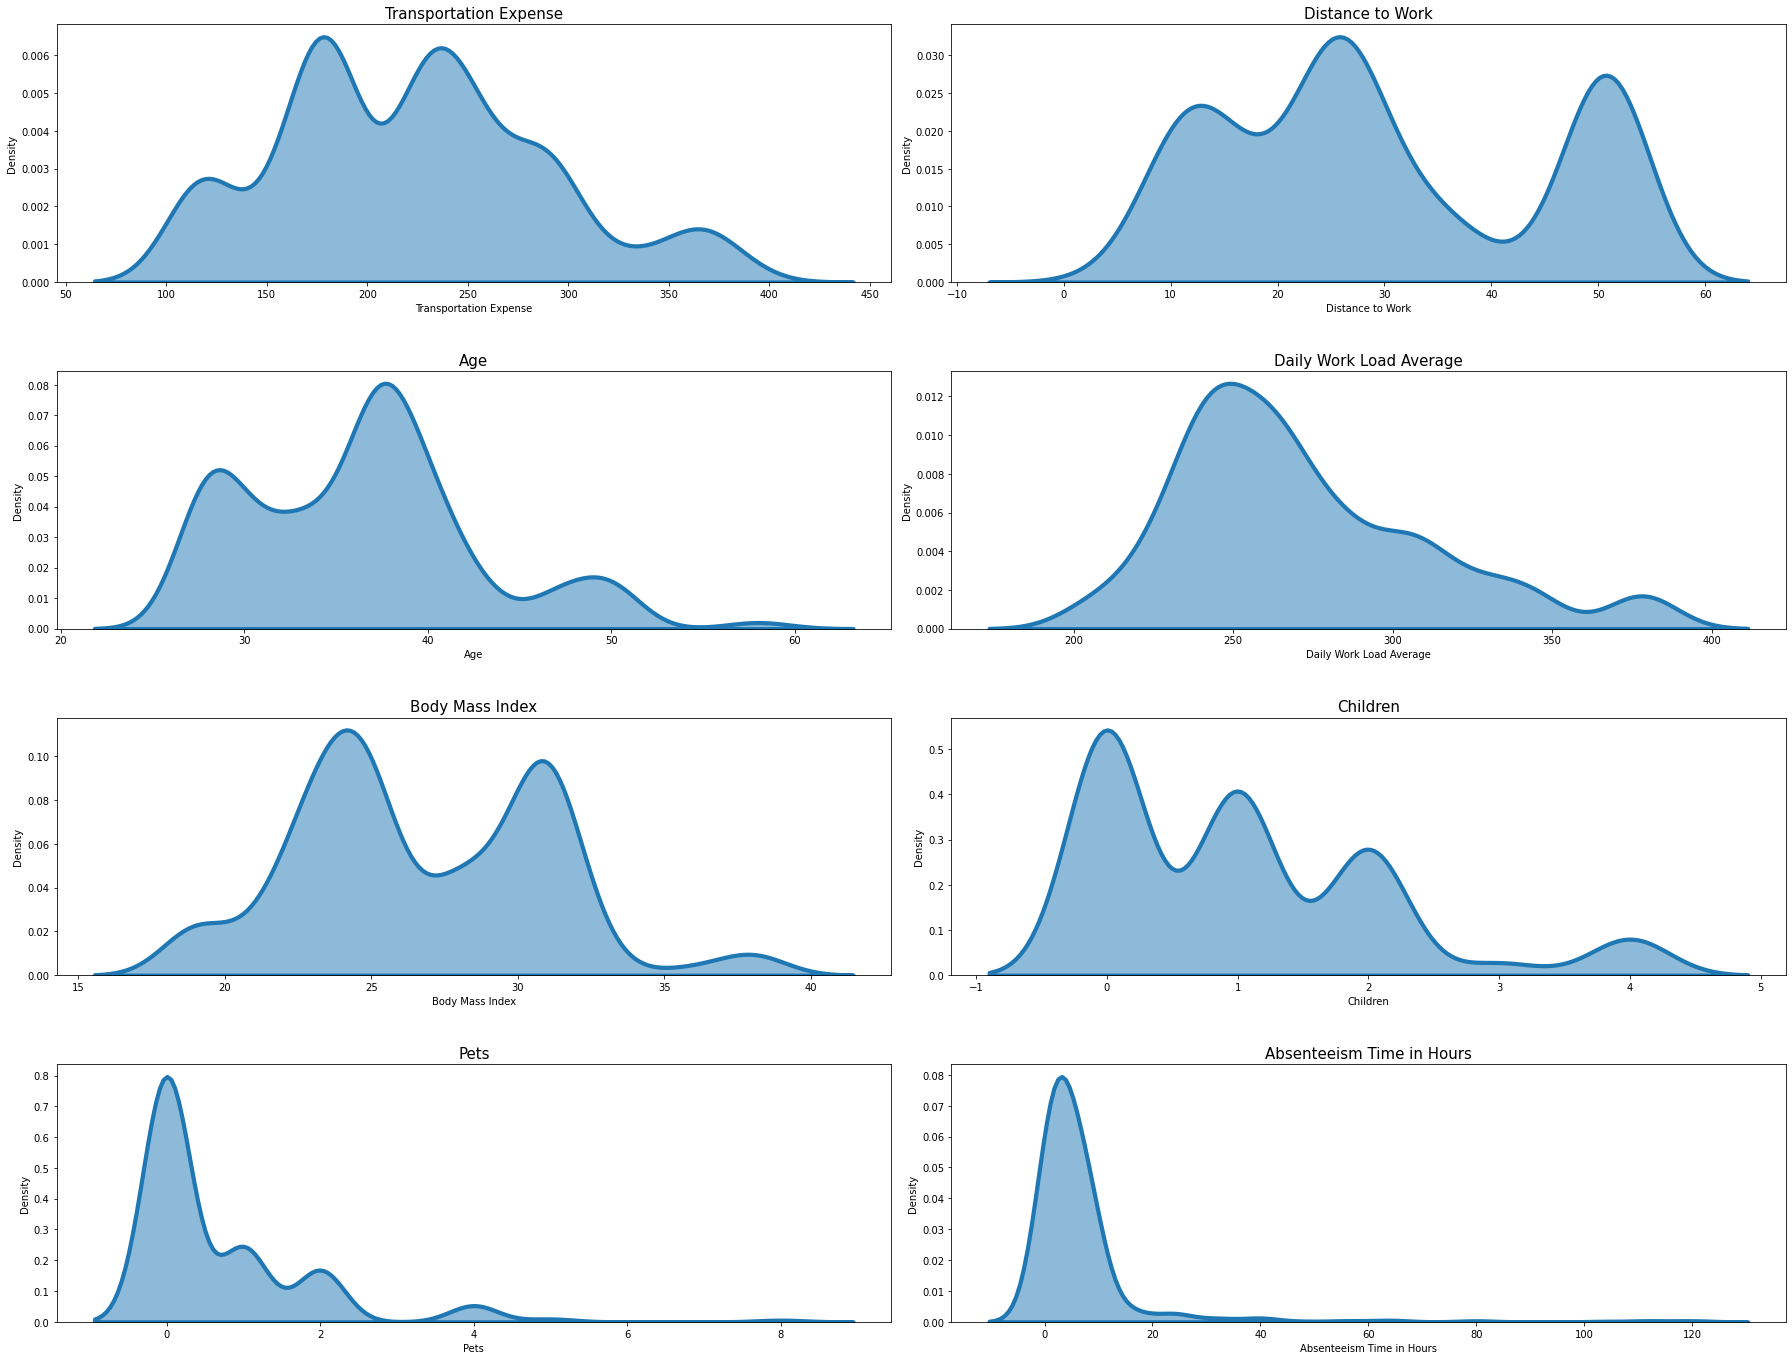

In [16]:
plt.figure(figsize=(25,19))
a = 1
for i in numeric_list:
    plt.subplot(4,2,a)
    plt.title(i,fontsize=15)
    sns.kdeplot(df[i],shade=True, alpha=.5, linewidth=4.2)
    a+=1
    plt.tight_layout(h_pad=4)

### Box plot

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will re

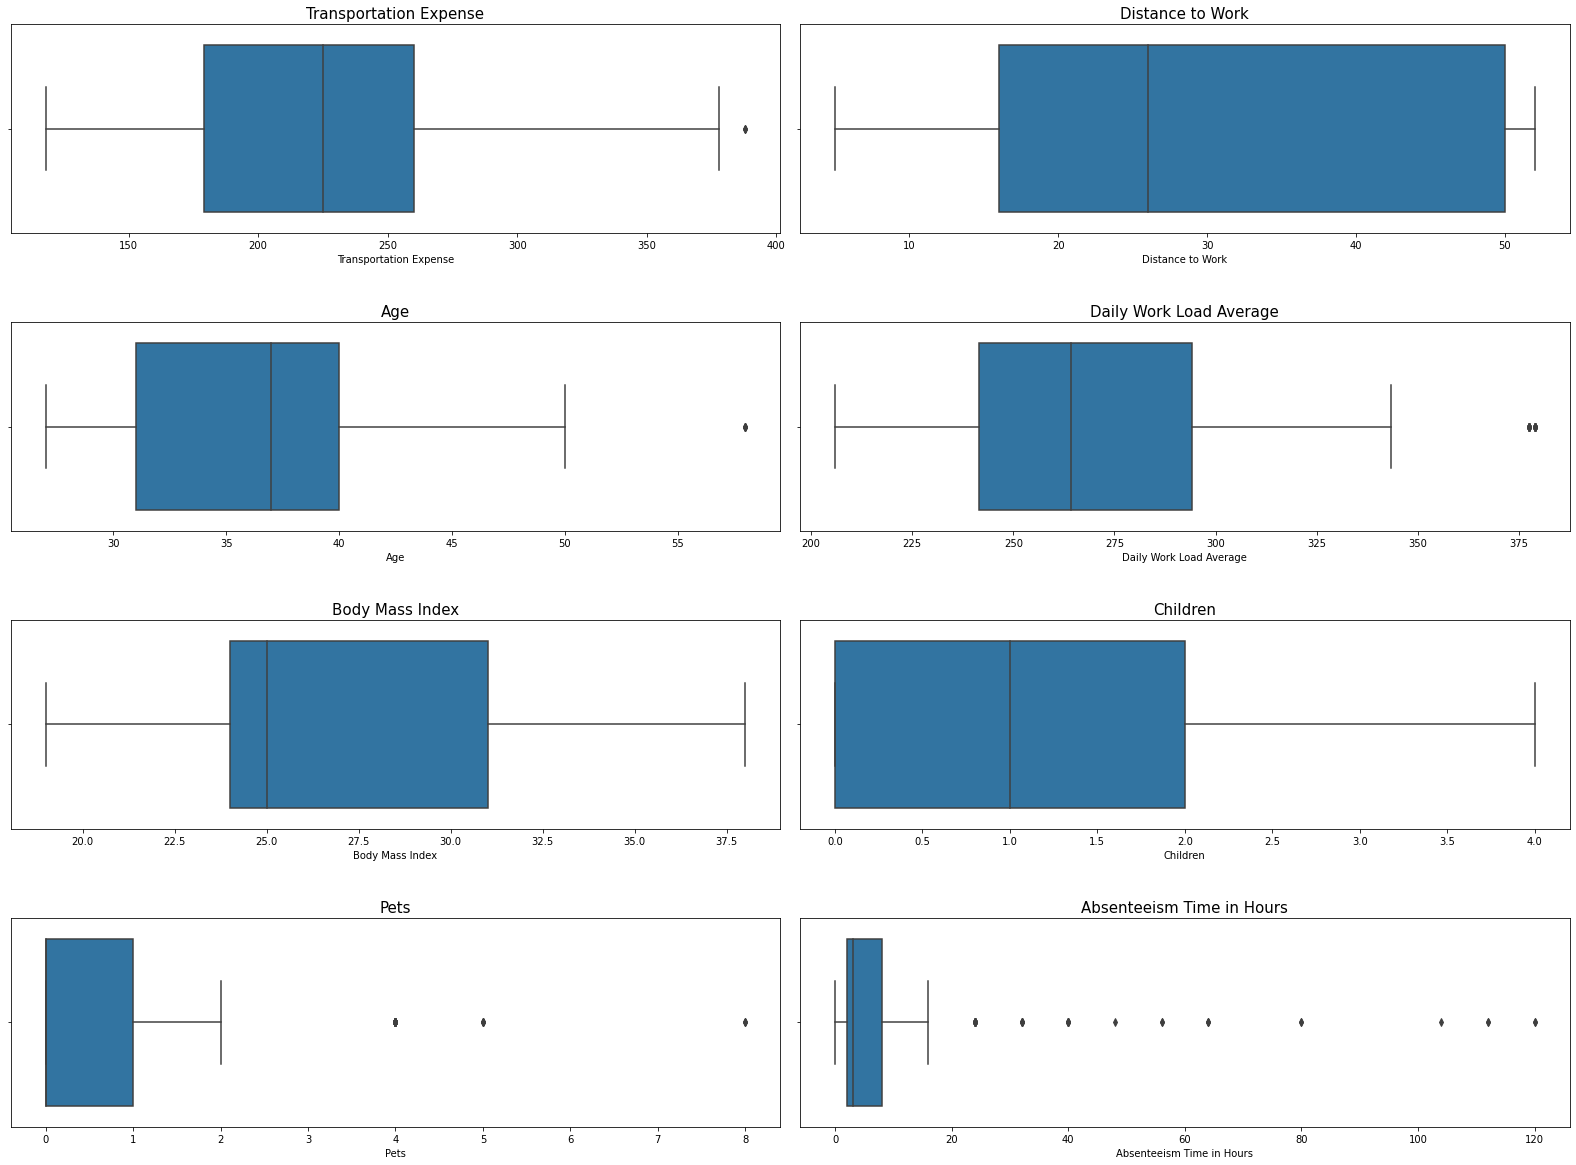

In [17]:
plt.figure(figsize=(22,20))
a = 1
for i in numeric_list:
    plt.subplot(5,2,a)
    plt.title(i,fontsize=15)
    sns.boxplot(df[i])
    a+=1
    plt.tight_layout(h_pad=4)

### Data Correlation

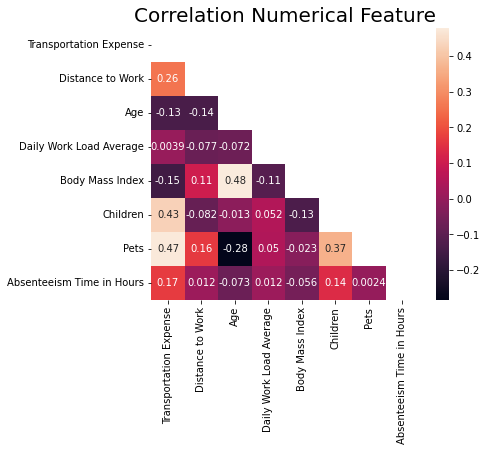

In [18]:
plt.figure(figsize=(6,5))
#Masking
mask = np.triu(np.ones_like(df[numeric_list].corr()))
sns.heatmap(df[numeric_list].corr("spearman"),annot=True,mask=mask)
plt.title("Correlation Numerical Feature",fontsize=20)
plt.show()

# Preprocessing

### .get_dummies()

In [19]:
reason_columns = pd.get_dummies(df['Reason for Absence'])
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [20]:
reason_columns['check'] =  reason_columns.sum(axis=1)
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [21]:
reason_columns['check'].sum(axis = 0)

700

In [22]:
reason_columns['check'].unique()

array([1], dtype=int64)

In [23]:
reason_columns = reason_columns.drop(['check'], axis =1)

In [24]:
reason_columns

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first = True)

In [26]:
reason_columns

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Group the Reasons for Absence:

In [27]:
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [28]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

In [29]:
df = df.drop(['Reason for Absence'], axis = 1)

In [30]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [31]:
reason_columns.loc[:, 1:14].max(axis =1)

0      0
1      0
2      0
3      1
4      0
      ..
695    1
696    1
697    1
698    0
699    0
Length: 700, dtype: uint8

In [32]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis = 1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis = 1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis = 1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis = 1)

## Concatenate Column Values

In [33]:
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2
...,...,...,...,...,...,...,...,...,...,...
695,23/05/2018,179,22,40,237.656,22,2,2,0,8
696,23/05/2018,225,26,28,237.656,24,1,1,2,3
697,24/05/2018,330,16,28,237.656,25,2,0,0,8
698,24/05/2018,235,16,32,237.656,25,3,0,0,2


In [34]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis = 1)

In [35]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


#### Change columns names

In [36]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [37]:
columns_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'reason_1', 'reason_2', 'reason_3', 'reason_4']

In [38]:
df.columns = columns_names

In [39]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,reason_1,reason_2,reason_3,reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


### Reorder Columns

In [40]:
columns_reordered = ['reason_1', 'reason_2', 'reason_3', 'reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

In [41]:
df = df[columns_reordered]

In [42]:
df.head()

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


## Creating a checkpoint

In [43]:
df_reason = df.copy()

In [44]:
df_reason.head()

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


#### Date

In [45]:
type(df_reason['Date'][0])

str

In [46]:
df_reason['Date'] = pd.to_datetime(df_reason['Date'])#,infer_datetime_format=False) #, format= '%d/%m/%y')

C:\Users\User\AppData\Local\Temp\ipykernel_8524\1810878604.py:1: UserWarning: Parsing '14/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_reason['Date'] = pd.to_datetime(df_reason['Date'])#,infer_datetime_format=False) #, format= '%d/%m/%y')
C:\Users\User\AppData\Local\Temp\ipykernel_8524\1810878604.py:1: UserWarning: Parsing '15/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_reason['Date'] = pd.to_datetime(df_reason['Date'])#,infer_datetime_format=False) #, format= '%d/%m/%y')
C:\Users\User\AppData\Local\Temp\ipykernel_8524\1810878604.py:1: UserWarning: Parsing '16/07/2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df_reason['Date'] = pd.to_datetime(df_reason['Date'])#,infer_datetime_format=False) #, format= '%d/%m/%y')
C:\Users\User\AppData\Local\Temp\ipykernel_8524\1810878604.py:1: UserWarning: P

In [47]:
df_reason['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
         ...    
695   2018-05-23
696   2018-05-23
697   2018-05-24
698   2018-05-24
699   2018-05-31
Name: Date, Length: 700, dtype: datetime64[ns]

In [48]:
df_reason.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   reason_1                   700 non-null    uint8         
 1   reason_2                   700 non-null    uint8         
 2   reason_3                   700 non-null    uint8         
 3   reason_4                   700 non-null    uint8         
 4   Date                       700 non-null    datetime64[ns]
 5   Transportation Expense     700 non-null    int64         
 6   Distance to Work           700 non-null    int64         
 7   Age                        700 non-null    int64         
 8   Daily Work Load Average    700 non-null    float64       
 9   Body Mass Index            700 non-null    int64         
 10  Education                  700 non-null    int64         
 11  Children                   700 non-null    int64         
 12  Pets    

## Extract the Month Value:

In [49]:
df_reason['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [50]:
df_reason['Date'][0].month

7

In [51]:
list_months = []
list_months

[]

In [52]:
for i in range(700):
    list_months.append(df_reason['Date'][i].month)

In [53]:
list_months

[7,
 7,
 7,
 7,
 7,
 10,
 7,
 7,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 5,
 12,
 3,
 10,
 8,
 8,
 8,
 4,
 12,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 4,
 8,
 8,
 8,
 1,
 7,
 1,
 8,
 9,
 9,
 9,
 9,
 4,
 9,
 9,
 9,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 11,
 9,
 9,
 6,
 10,
 10,
 10,
 10,
 10,
 6,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 5,
 4,
 5,
 12,
 11,
 2,
 9,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 2,
 10,
 11,
 11,
 1,
 1,
 2,
 2,
 3,
 4,
 8,
 9,
 10,
 11,
 12,
 12,
 11,
 12,
 12,
 6,
 4,
 5,
 5,
 6,
 7,
 7,
 8,
 11,
 12,
 12,
 1,
 1,
 1,
 11,
 12,
 12,
 12,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 3,
 10,
 11,
 11,
 12,
 12,
 8,
 9,
 2,
 9,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 8,
 3,
 3,
 2,
 3,
 4,
 4,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 4,
 12,
 4,
 4,
 4,
 4,
 6,
 7,
 8,
 8,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 8,
 4,
 4,
 5,
 2,
 3,
 3,
 11,
 9,
 10,
 4,
 11,
 5,
 5,
 5,
 5,
 11,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 3,
 7,
 8,
 9,
 10,
 6,
 6

In [54]:
len(list_months)

700

In [55]:
df_reason['Month_value'] = list_months

In [56]:
df_reason.head(20)

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
5,0,0,0,1,2015-10-07,179,51,38,239.554,31,1,0,0,2,10
6,0,0,0,1,2015-07-17,361,52,28,239.554,27,1,1,4,8,7
7,0,0,0,1,2015-07-24,260,50,36,239.554,23,1,4,0,4,7
8,0,0,1,0,2015-06-07,155,12,34,239.554,25,1,2,0,40,6
9,0,0,0,1,2015-07-13,235,11,37,239.554,29,3,1,1,8,7


## Extract the Day of the Week

In [57]:
df_reason['Date'][699].weekday()

3

In [58]:
df_reason['Date'][699]

Timestamp('2018-05-31 00:00:00')

In [59]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [60]:
df_reason['Day of the Week'] = df_reason['Date'].apply(date_to_weekday)

In [61]:
df_reason.head()

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [62]:
df_reason_date = df_reason.copy()
df_reason_date

,reason_1,reason_2,reason_3,reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month_value,Day of the Week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1,0,0,0,2018-05-23,179,22,40,237.656,22,2,2,0,8,5,2
696,1,0,0,0,2018-05-23,225,26,28,237.656,24,1,1,2,3,5,2
697,1,0,0,0,2018-05-24,330,16,28,237.656,25,2,0,0,8,5,3
698,0,0,0,1,2018-05-24,235,16,32,237.656,25,3,0,0,2,5,3


## Modify 'Education' column

In [63]:
df_reason_date.columns.values

array(['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month_value',
       'Day of the Week'], dtype=object)

In [64]:
columns_reord = ['reason_1', 'reason_2', 'reason_3', 'reason_4', 'Month_value',
       'Day of the Week', 'Date','Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours'] 

In [65]:
df_reason_date = df_reason_date[columns_reord]

In [66]:
df_reason_date = df_reason_date.drop(['Date'],axis = 1)

In [67]:
df_reason_date.head()

,reason_1,reason_2,reason_3,reason_4,Month_value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


In [68]:
df_reason_date['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [69]:
df_reason_date['Education'].value_counts()

1    583
3     73
2     40
4      4
Name: Education, dtype: int64

In [70]:
df_reason_date['Education'] = df_reason_date['Education'].map({1:0, 2:1, 3:1, 4:1})

In [71]:
df_reason_date['Education'].unique()

array([0, 1], dtype=int64)

In [72]:
df_reason_date['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

# Final Checkpoint

In [73]:
df_preprocessed = df_reason_date.copy()
df_preprocessed.head()

,reason_1,reason_2,reason_3,reason_4,Month_value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2


In [74]:
df_preprocessed.to_csv('Absenteeism_preprocessed.csv', index = False)

# Now, Building Machine Learning Model - Logistic Regression for Prediction Will be continued in next JupyterNotebook